In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pandas import DataFrame,Series
from scipy import stats
from sklearn.linear_model import LinearRegression

# 3. Êï∞ÊçÆÂèØËßÜÂåñÂíåÊëòË¶Å
## 3.1 Êï∞ÊçÆÂèØËßÜÂåñÂíåÊëòË¶Å
### Êï∞ÊçÆÊëòË¶Å
È¶ñÂÖà‰ΩøÁî®pandasÂ∫ì‰∏≠ÁöÑÊñπÊ≥ïÂ∞ÜÂ±ûÊÄßÂàíÂàÜ‰∏∫Ê†áÁß∞ÂûãÂíåÊï∞ÂÄºÂûã

In [2]:
def object_number_divide(dataset):
    winedata_columns = dataset.columns[1::]
    winedata_object_list = []
    winedata_number_list = []
    for obj in winedata_columns:
        if str(dataset[obj].dtypes)== 'object':
            winedata_object_list.append(obj)
        else:
            winedata_number_list.append(obj)
    return winedata_object_list,winedata_number_list

#### ÂèëÁé∞‰∏ãÈù¢‰∏≠ÁöÑÁ¨¨‰∏Ä‰∏™ËæìÂá∫ÂàóË°®['trending_date', 'title', 'channel_title', 'publish_time', 'tags', 'thumbnail_link', 'description']‰∏≠ÁöÑÂ±ûÊÄß‰∏∫Ê†áÁß∞ÂûãÔºåÂêéÈù¢ÁöÑÂàóË°®['category_id', 'views', 'likes', 'dislikes', 'comment_count', 'comments_disabled', 'ratings_disabled', 'video_error_or_removed']‰∏∫Êï∞ÂÄºÂûã

In [3]:
dataset=pd.read_csv('./CAvideos.csv',header=0,sep='',delimiter=",", encoding='utf-8')
winedata_object_list,winedata_number_list = object_number_divide(dataset)
print(winedata_object_list,winedata_number_list)

['trending_date', 'title', 'channel_title', 'publish_time', 'tags', 'thumbnail_link', 'description'] ['category_id', 'views', 'likes', 'dislikes', 'comment_count', 'comments_disabled', 'ratings_disabled', 'video_error_or_removed']


#### ÂØπÊ†áÁß∞Â±ûÊÄßÔºåÁªôÂá∫ÊØè‰∏™ÂèØËÉΩÂèñÂÄºÁöÑÈ¢ëÊï∞
‰∏ãÈù¢ÂØπ‰∫éÊØè‰∏™Ê†áÁß∞ÂûãÂ±ûÊÄß‰∏≠ÁöÑÂ±ûÊÄßÂÄºÊ±ÇÂá∫ÂØπÂ∫îÊØè‰∏™ÂèØËÉΩÂèñÂÄºÁöÑÈ¢ëÊï∞

In [4]:
for wol in winedata_object_list:
    print('*'*30)
    print(wol)
    print(dataset[wol].value_counts())

******************************
trending_date
18.12.06    200
18.19.04    200
18.01.06    200
17.29.11    200
18.30.05    200
18.23.03    200
18.26.05    200
18.28.01    200
18.05.03    200
18.04.05    200
17.01.12    200
17.08.12    200
18.24.04    200
18.21.05    200
18.08.03    200
18.01.04    200
18.06.06    200
18.08.02    200
18.02.01    200
18.12.05    200
17.03.12    200
17.10.12    200
18.13.01    200
18.29.03    200
18.06.05    200
17.21.11    200
18.22.03    200
17.23.12    200
18.05.01    200
17.05.12    200
           ... 
18.22.02    199
18.23.04    199
18.14.04    199
18.11.02    199
18.17.02    199
18.22.01    199
18.14.03    199
17.29.12    199
18.29.04    199
18.15.05    199
18.19.01    199
17.12.12    199
17.04.12    199
17.07.12    198
18.24.02    198
18.06.02    198
18.19.05    198
18.23.02    198
18.27.02    198
18.15.02    198
18.28.02    197
18.09.03    197
18.25.04    197
18.19.03    197
18.29.01    196
18.02.02    195
18.13.02    195
18.31.01    191
18.01.02   

#### Êï∞ÂÄºÂ±ûÊÄßÔºåÁªôÂá∫ÊúÄÂ§ß„ÄÅÊúÄÂ∞è„ÄÅÂùáÂÄº„ÄÅ‰∏≠‰ΩçÊï∞„ÄÅÂõõÂàÜ‰ΩçÊï∞ÂèäÁº∫Â§±ÂÄºÁöÑ‰∏™Êï∞„ÄÇ
‰∏ãÈù¢ÂØπ‰∫éÊï∞ÂÄºÂûãÂ±ûÊÄßÔºåÊ±ÇÂá∫ÊúÄÂ§ß„ÄÅÊúÄÂ∞è„ÄÅÂùáÂÄº„ÄÅ‰∏≠‰ΩçÊï∞„ÄÅÂõõÂàÜ‰ΩçÊï∞ÂèäÁº∫Â§±ÂÄºÁöÑ‰∏™Êï∞„ÄÇ‰∏ãÈù¢ÁöÑÊØè‰∏ÄË°åÂàÜÂà´ÂØπÂ∫îÊúÄÂ∞èÔºåÊúÄÂ§ßÔºåÂπ≥ÂùáÂÄºÔºå‰∏≠‰ΩçÊï∞ÔºåÂõõÂàÜ‰ΩçÊï∞
ÂíåÁº∫Â§±ÂÄºÁöÑ‰∏™Êï∞„ÄÇ

In [5]:
cnt = len(dataset)
for wol in winedata_number_list:
    print('*'*30)
    print(wol)
    print(dataset[wol].min())
    print(dataset[wol].max())
    print(dataset[wol].mean())
    print(dataset[wol].median())
    print(dataset[wol].dropna().quantile(q=[0.25,0.75]))
    print(cnt-dataset[wol].count())

******************************
category_id
1
43
20.795552946356498
24.0
0.25    20.0
0.75    24.0
Name: category_id, dtype: float64
0
******************************
views
733
137843120
1147035.9107898534
371204.0
0.25    143902.0
0.75    963302.0
Name: views, dtype: float64
0
******************************
likes
0
5053338
39582.68824148137
8780.0
0.25     2191.0
0.75    28717.0
Name: likes, dtype: float64
0
******************************
dislikes
0
1602383
2009.1954453168953
303.0
0.25     99.0
0.75    950.0
Name: dislikes, dtype: float64
0
******************************
comment_count
0
1114800
5042.974707076637
1301.0
0.25     417.0
0.75    3713.0
Name: comment_count, dtype: float64
0
******************************
comments_disabled
False
True
0.014260903598248576
0.0
0.25    0.0
0.75    0.0
Name: comments_disabled, dtype: float64
0
******************************
ratings_disabled
False
True
0.00682468628458208
0.0
0.25    0.0
0.75    0.0
Name: ratings_disabled, dtype: float64
0
******

### Êï∞ÊçÆÁöÑÂèØËßÜÂåñ
#### ÈíàÂØπÊï∞ÂÄºÂ±ûÊÄßÔºå
##### ÁªòÂà∂Áõ¥ÊñπÂõæÔºåÁî®qqÂõæÊ£ÄÈ™åÂÖ∂ÂàÜÂ∏ÉÊòØÂê¶‰∏∫Ê≠£ÊÄÅÂàÜÂ∏É„ÄÇ
##### ÁªòÂà∂ÁõíÂõæÔºåÂØπÁ¶ªÁæ§ÂÄºËøõË°åËØÜÂà´
È¶ñÂÖàÂØπ‰∫éviewsÂ±ûÊÄßËøõË°åÁªòÂà∂Áõ¥ÊñπÂõæÔºåQQÂõæÂíåÁõíÂõæÔºåÊàë‰ª¨‰ªéQQÂõæ‰∏≠ÂèëÁé∞R=0.2708Ôºå ‰∏çÊòØÊ≠£ÊÄÅÂàÜÂ∏ÉÔºå‰ªéÁõíÂõæ‰∏≠ÂèëÁé∞ÔºåÁ¶ªÁæ§ÁÇπÁöÑ‰∏™Êï∞ÂæàÂ§ö

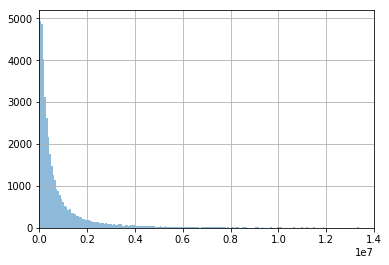

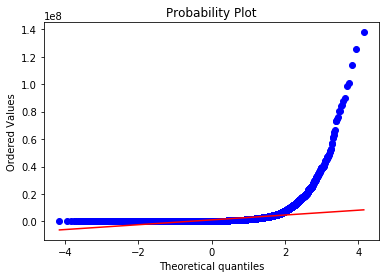

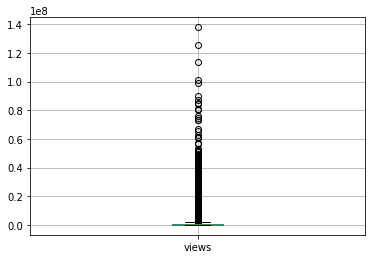

In [6]:
cname = 'views'
plt.xlim(700,14000000)
dataset[cname].hist(alpha=0.5, bins=2000)
plt.show()
stats.probplot(dataset[cname], dist="norm", plot=plt)
plt.show()
data_price=DataFrame(dataset,columns=[cname])
data_price.boxplot()
plt.show()

È¶ñÂÖàÂØπ‰∫élikesÂ±ûÊÄßËøõË°åÁªòÂà∂Áõ¥ÊñπÂõæÔºåQQÂõæÂíåÁõíÂõæÔºåÊàë‰ª¨‰ªéQQÂõæ‰∏≠ÂèëÁé∞R=0.2548Ôºå ‰∏çÊòØÊ≠£ÊÄÅÂàÜÂ∏ÉÔºå‰ªéÁõíÂõæ‰∏≠ÂèëÁé∞ÔºåÁ¶ªÁæ§ÁÇπÁöÑ‰∏™Êï∞ÂæàÂ§ö

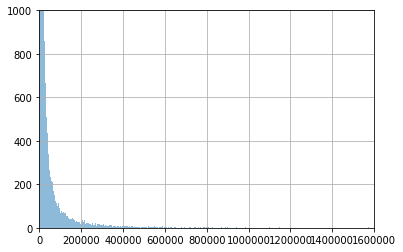

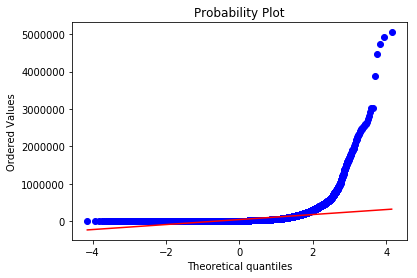

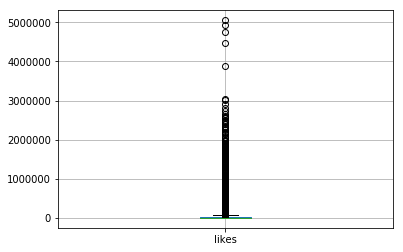

In [7]:
cname = 'likes'
plt.xlim(0,1600000)
plt.ylim(0,1000)
dataset[cname].hist(alpha=0.5, bins=2000)
plt.show()
stats.probplot(dataset[cname], dist="norm", plot=plt)
plt.show()
data_price=DataFrame(dataset,columns=[cname])
data_price.boxplot()
plt.show()

È¶ñÂÖàÂØπ‰∫édislikesÂ±ûÊÄßËøõË°åÁªòÂà∂Áõ¥ÊñπÂõæÔºåQQÂõæÂíåÁõíÂõæÔºåÊàë‰ª¨‰ªéQQÂõæ‰∏≠ÂèëÁé∞R=0.049Ôºå ‰∏çÊòØÊ≠£ÊÄÅÂàÜÂ∏ÉÔºå‰ªéÁõíÂõæ‰∏≠ÂèëÁé∞ÔºåÁ¶ªÁæ§ÁÇπÁöÑ‰∏™Êï∞Â∞ë‰∏Ä‰∫õ

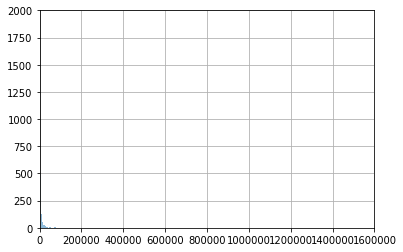

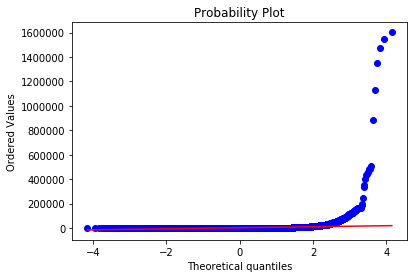

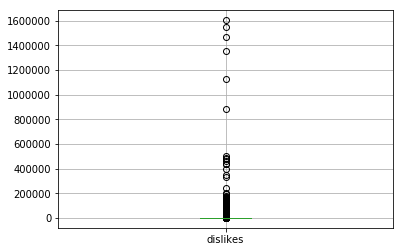

In [8]:
cname = 'dislikes'
plt.xlim(0,1600000)
plt.ylim(0,2000)
dataset[cname].hist(alpha=0.5, bins=2000)
plt.show()
stats.probplot(dataset[cname], dist="norm", plot=plt)
plt.show()
data_price=DataFrame(dataset,columns=[cname])
data_price.boxplot()
plt.show()

È¶ñÂÖàÂØπ‰∫écomment_countÂ±ûÊÄßËøõË°åÁªòÂà∂Áõ¥ÊñπÂõæÔºåQQÂõæÂíåÁõíÂõæÔºåÊàë‰ª¨‰ªéQQÂõæ‰∏≠ÂèëÁé∞R=0.1600Ôºå ‰∏çÊòØÊ≠£ÊÄÅÂàÜÂ∏ÉÔºå‰ªéÁõíÂõæ‰∏≠ÂèëÁé∞ÔºåÁ¶ªÁæ§ÁÇπÁöÑ‰∏™Êï∞ÂæàÂ§ö

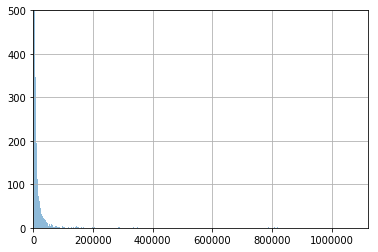

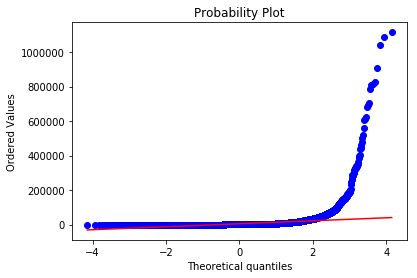

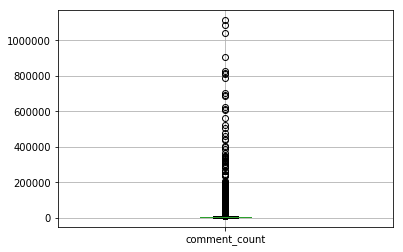

In [9]:
cname = 'comment_count'
plt.xlim(0,1120000)
plt.ylim(0,500)
dataset[cname].hist(alpha=0.5, bins=2000)
plt.show()
stats.probplot(dataset[cname], dist="norm", plot=plt)
plt.show()
data_price=DataFrame(dataset,columns=[cname])
data_price.boxplot()
plt.show()

## ËØ•Êï∞ÊçÆÈõÜÊ≤°ÊúâÁº∫Â§±Êï∞ÊçÆÔºåÊïÖÊó†Ê≥ïËøõË°åÁº∫Â§±ÂÄºÁöÑË°•ÂÖÖ